# Carga de Datos

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [25]:
data = pd.read_csv("./data/heart_2022_no_nans.csv")
# data.head(10)

# Exploración/Visualización de Datos

In [3]:
pd.DataFrame(data.columns)


,0
0,State
1,Sex
2,GeneralHealth
3,PhysicalHealthDays
4,MentalHealthDays
5,LastCheckupTime
6,PhysicalActivities
7,SleepHours
8,RemovedTeeth
9,HadHeartAttack


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", style="dark", palette="Set2", color_codes=True, font_scale=1.5)
plt.rcParams["figure.figsize"] = (20,8)

### Genero(Sex) por Categoria de Edad (AgeCategory)

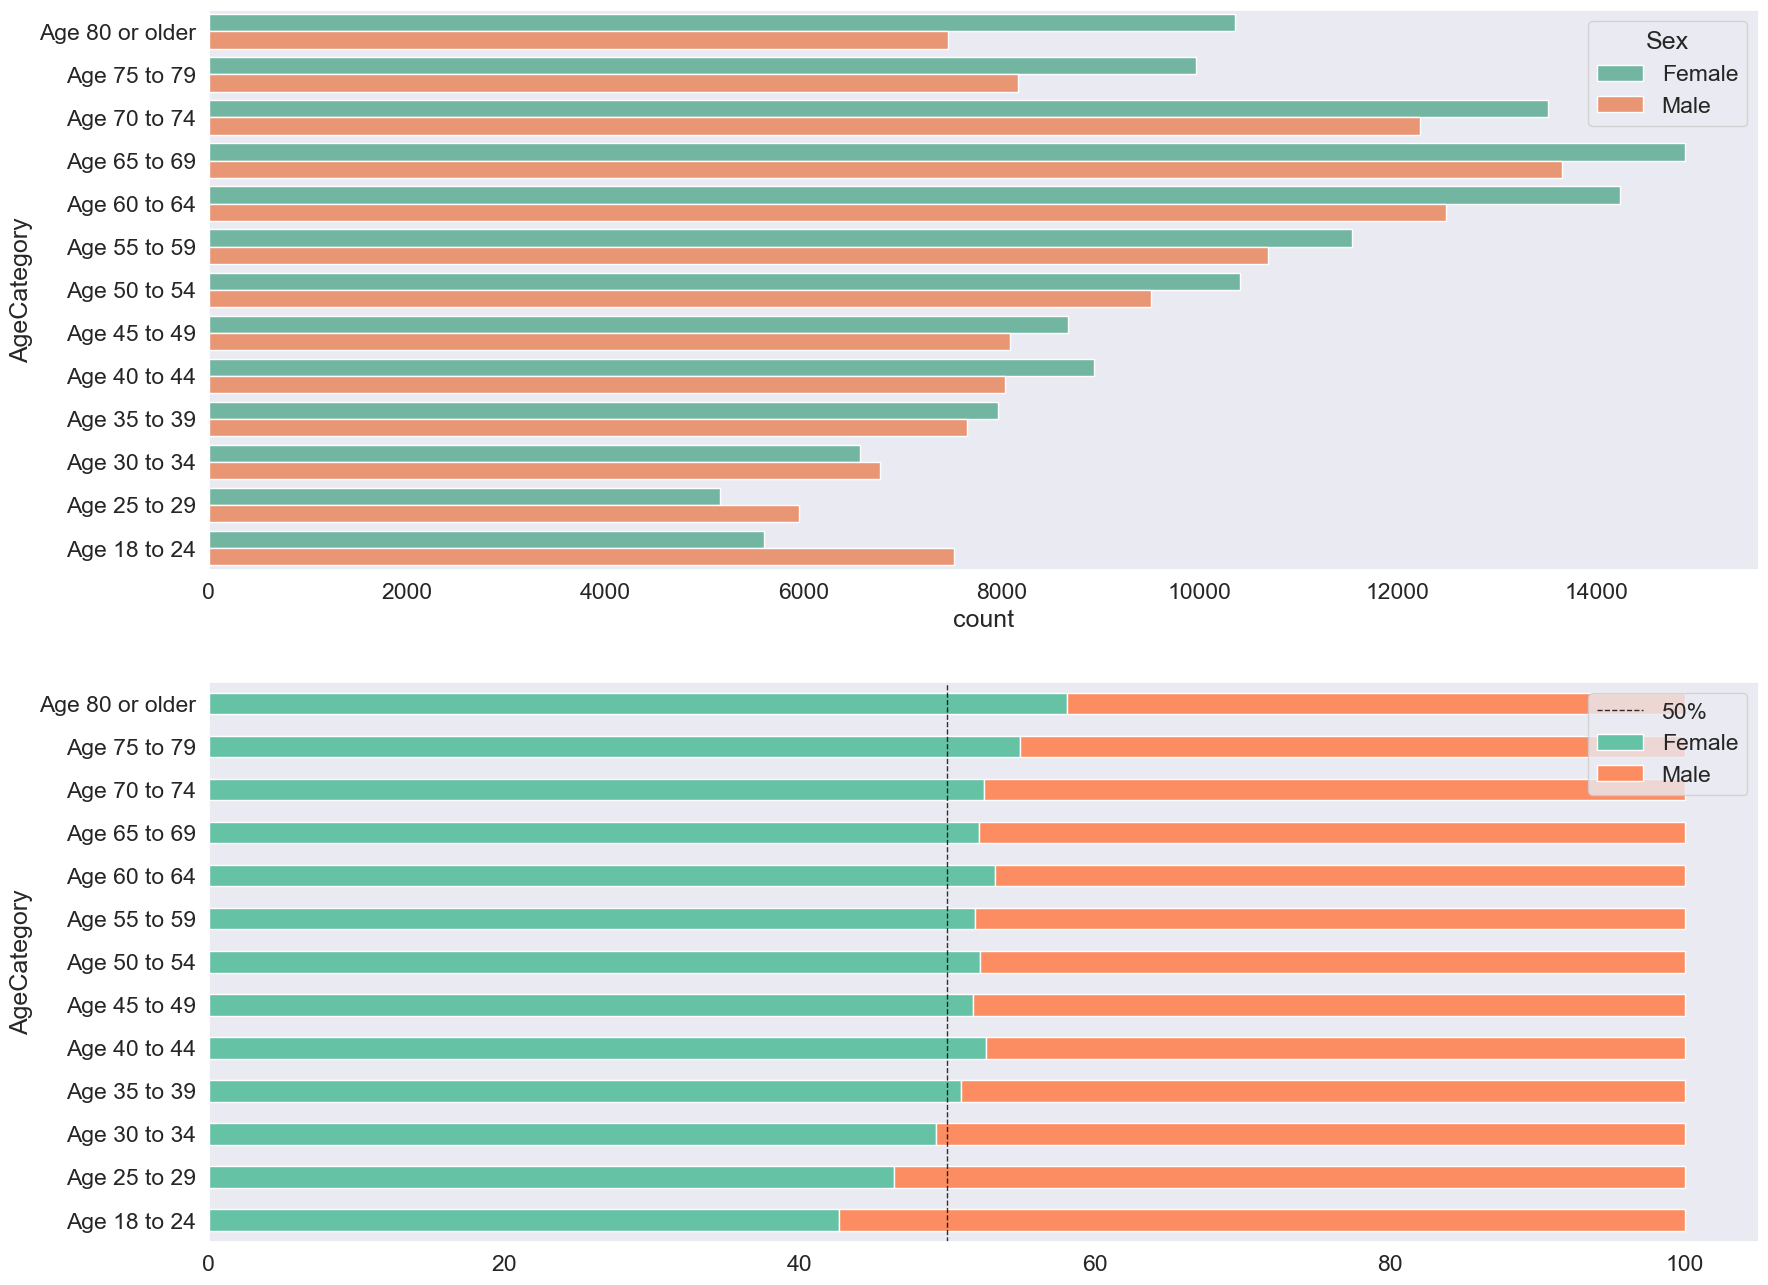

In [5]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 16))
order_of_bars_age = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 
    'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 
    'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'
    ]
sns.countplot(y='AgeCategory', hue="Sex", data=data, order=order_of_bars_age[::-1], ax=ax1)
total = data.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_age)
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax.axvline(x=50, color='black', linestyle='--', linewidth=1, alpha=0.8, label='50%')
plt.legend()



### Relación entre peso (WeightInKilograms), altura (HeightInMeters) y el índice de masa comporal (BMI)

<Axes: xlabel='WeightInKilograms', ylabel='HeightInMeters'>

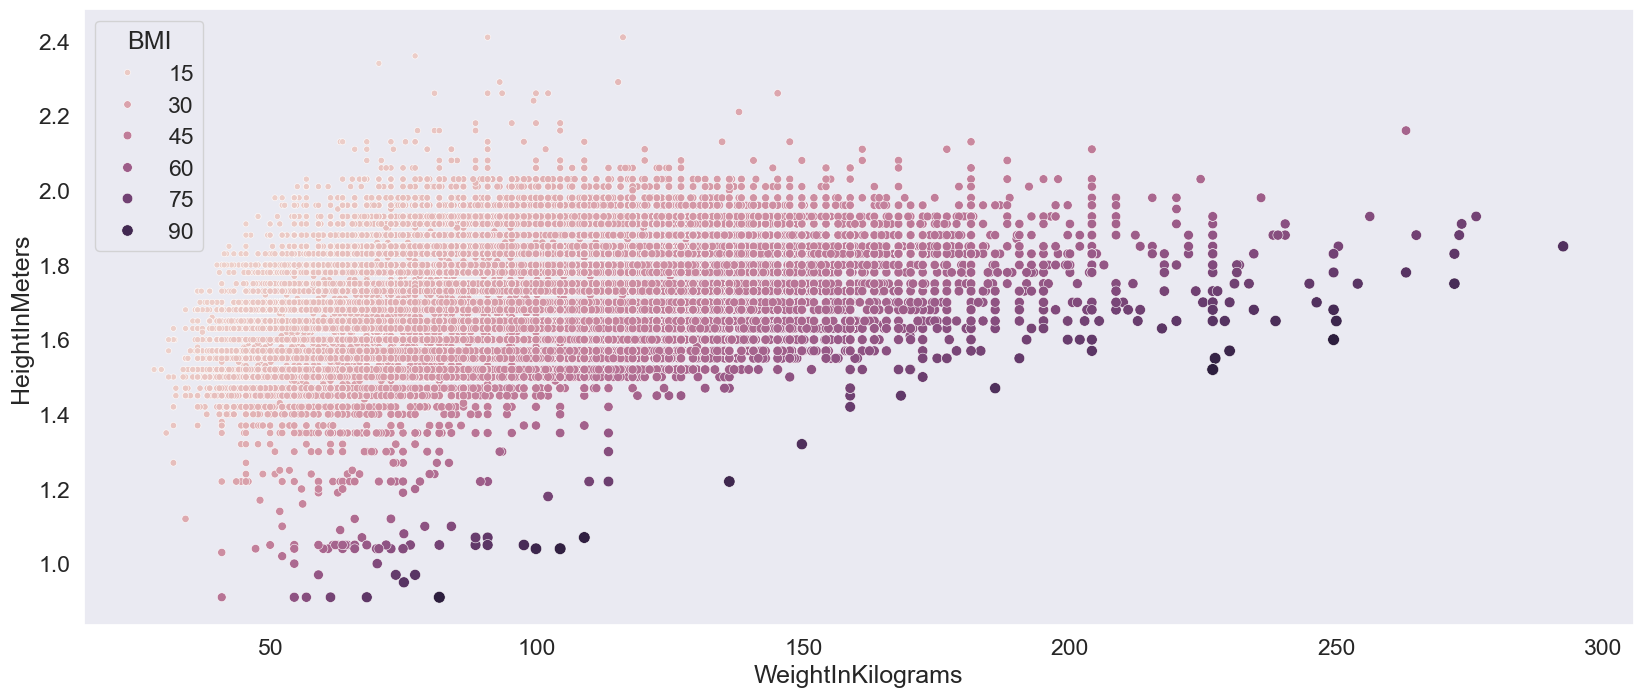

In [6]:
sns.scatterplot(data=data, y='HeightInMeters', x='WeightInKilograms', hue='BMI', size="BMI")


### Casos de BMI mayor a 30 (Obesidad)

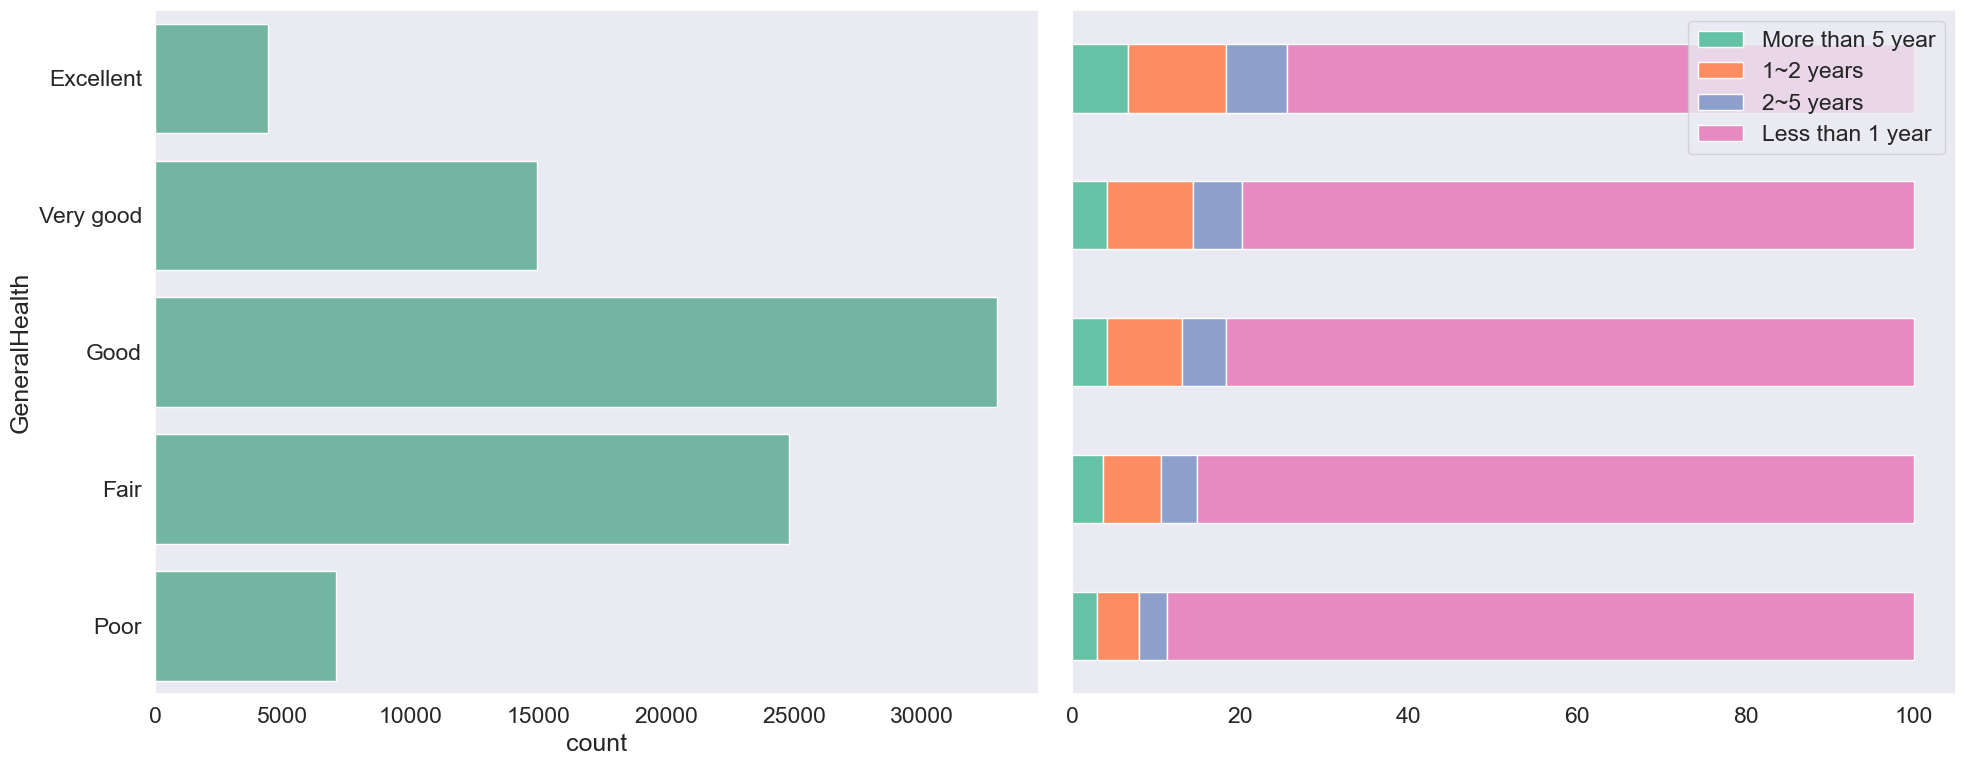

In [7]:
BMI30 = data.loc[data['BMI'] > 30 ] # Obesidad (segun fuentes)
BMI = data.loc[data['BMI'] <= 30 ]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
order_of_bars_feel = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
legend = ['Within past year (anytime less than 12 months ago)',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)',
       '5 or more years ago']
legend_alias = ['More than 5 year', '1~2 years', '2~5 years', 'Less than 1 year']
sns.countplot(y='GeneralHealth', data=BMI30, order=order_of_bars_feel,ax=ax1)
total = data.groupby(['GeneralHealth','LastCheckupTime']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_feel[::-1])
total[legend]
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax2.legend(legend_alias, loc='upper right')
fig.tight_layout()



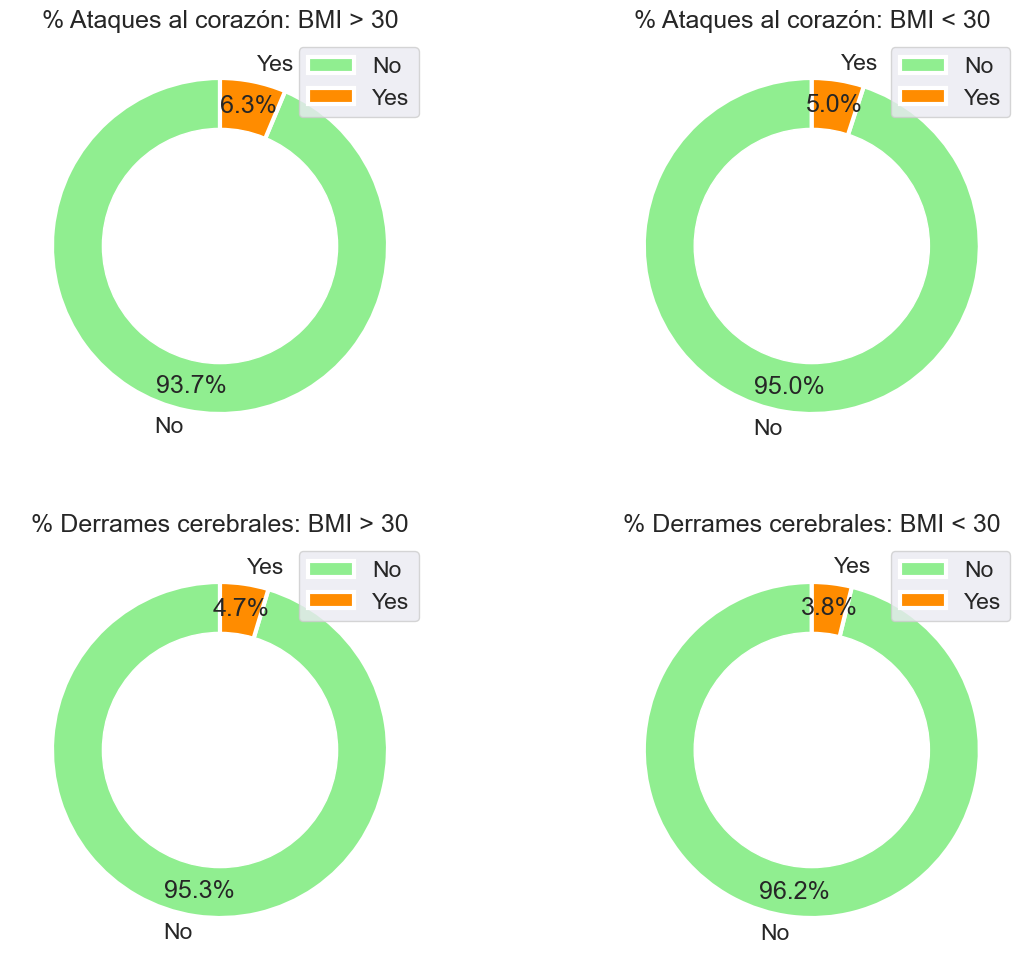

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(14,12))
colors = ['lightgreen', 'darkorange']

heart_attack = BMI30.groupby(['HadHeartAttack']).size()
ax1.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.legend(labels=['No', 'Yes'], loc='upper right')
ax1.set_title('% Ataques al corazón: BMI > 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax1.add_artist(my_circle)

heart_attack = BMI.groupby(['HadHeartAttack']).size()
ax2.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2.legend(labels=['No', 'Yes'], loc='upper right')
ax2.set_title('% Ataques al corazón: BMI < 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax2.add_artist(my_circle)

stroke = BMI30.groupby(['HadStroke']).size()
ax3.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax3.legend(labels=['No', 'Yes'], loc='upper right')
ax3.set_title('% Derrames cerebrales: BMI > 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax3.add_artist(my_circle)

stroke = BMI.groupby(['HadStroke']).size()
ax4.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax4.legend(labels=['No', 'Yes'], loc='upper right')
ax4.set_title('% Derrames cerebrales: BMI < 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax4.add_artist(my_circle)

<Axes: xlabel='BMI', ylabel='Count'>

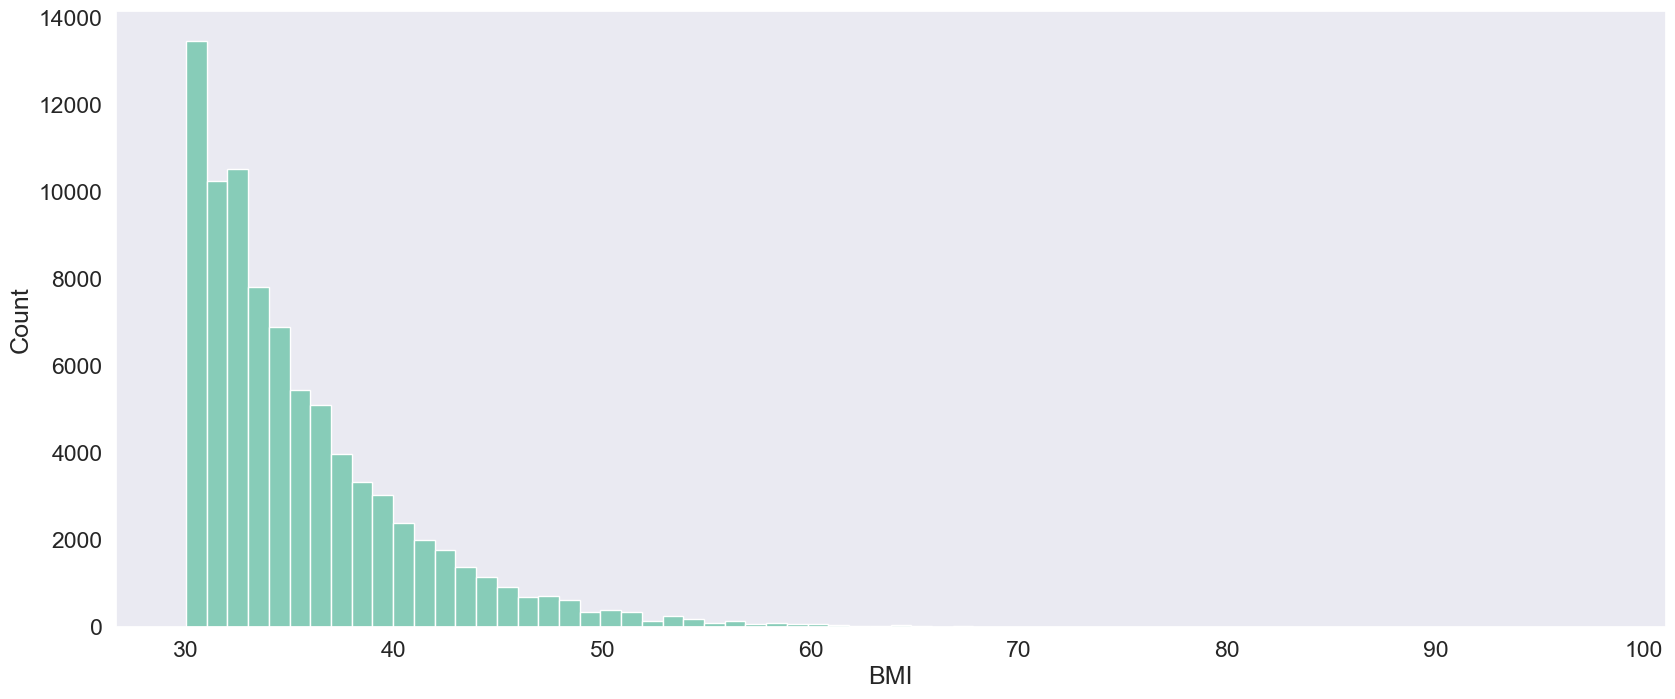

In [9]:
sns.histplot(data=BMI30, x="BMI", binwidth=1)

### Casos de 30 dias se sentirse mal (Fisica y mentalmente)

<Axes: xlabel='MentalHealthDays', ylabel='Count'>

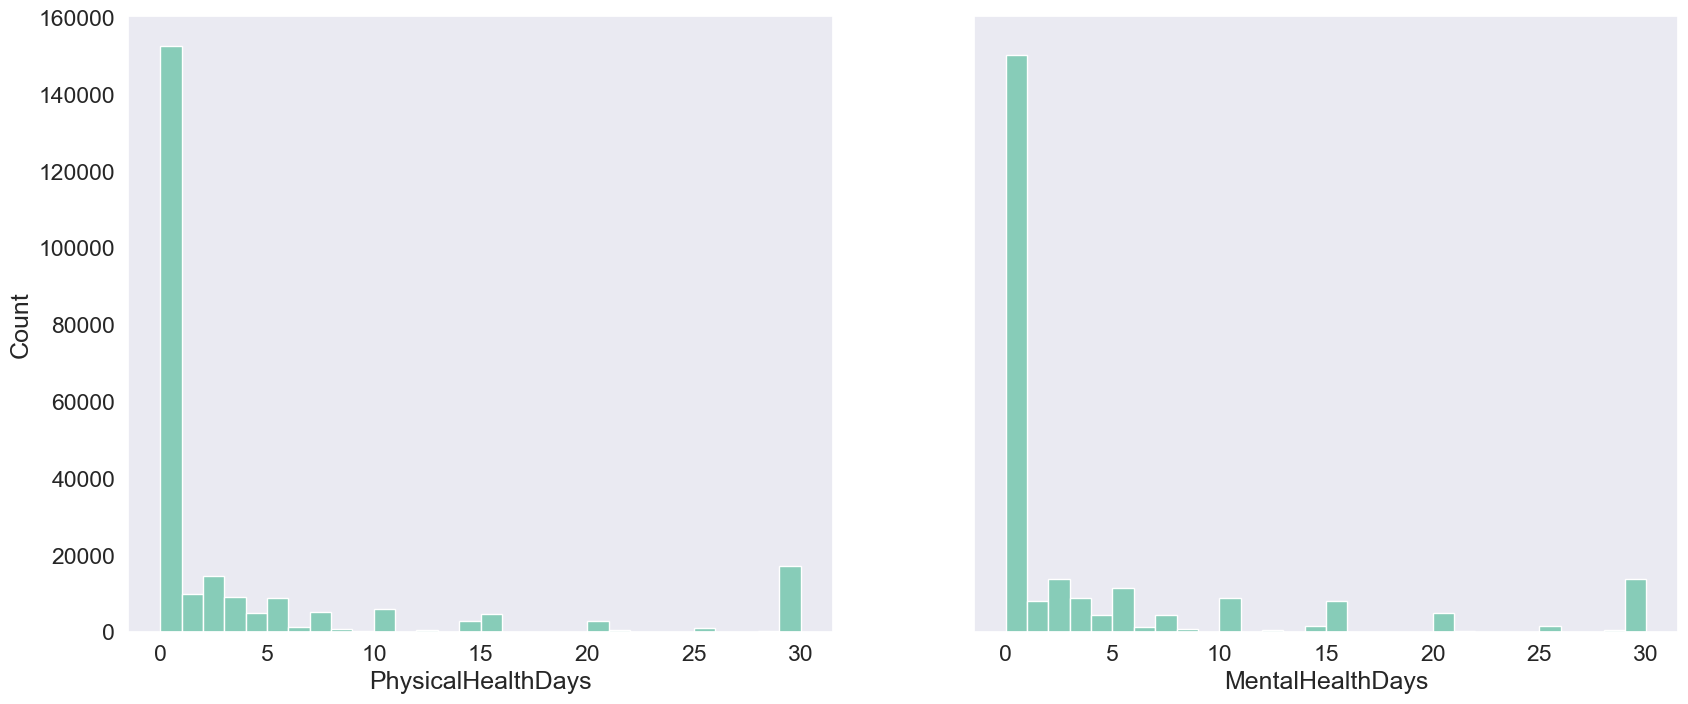

In [10]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)

sns.histplot(data=data, x='PhysicalHealthDays', ax=ax1, binwidth=1)
sns.histplot(data=data, x='MentalHealthDays', ax=ax2, binwidth=1)

In [11]:
PLUS30 = data.loc[data["PhysicalHealthDays"] >= 20]
PLUS30 = PLUS30.loc[PLUS30["MentalHealthDays"] >= 20]

MINUS30 = data.loc[data["PhysicalHealthDays"] < 20]
MINUS30 = MINUS30.loc[MINUS30["MentalHealthDays"] < 20]

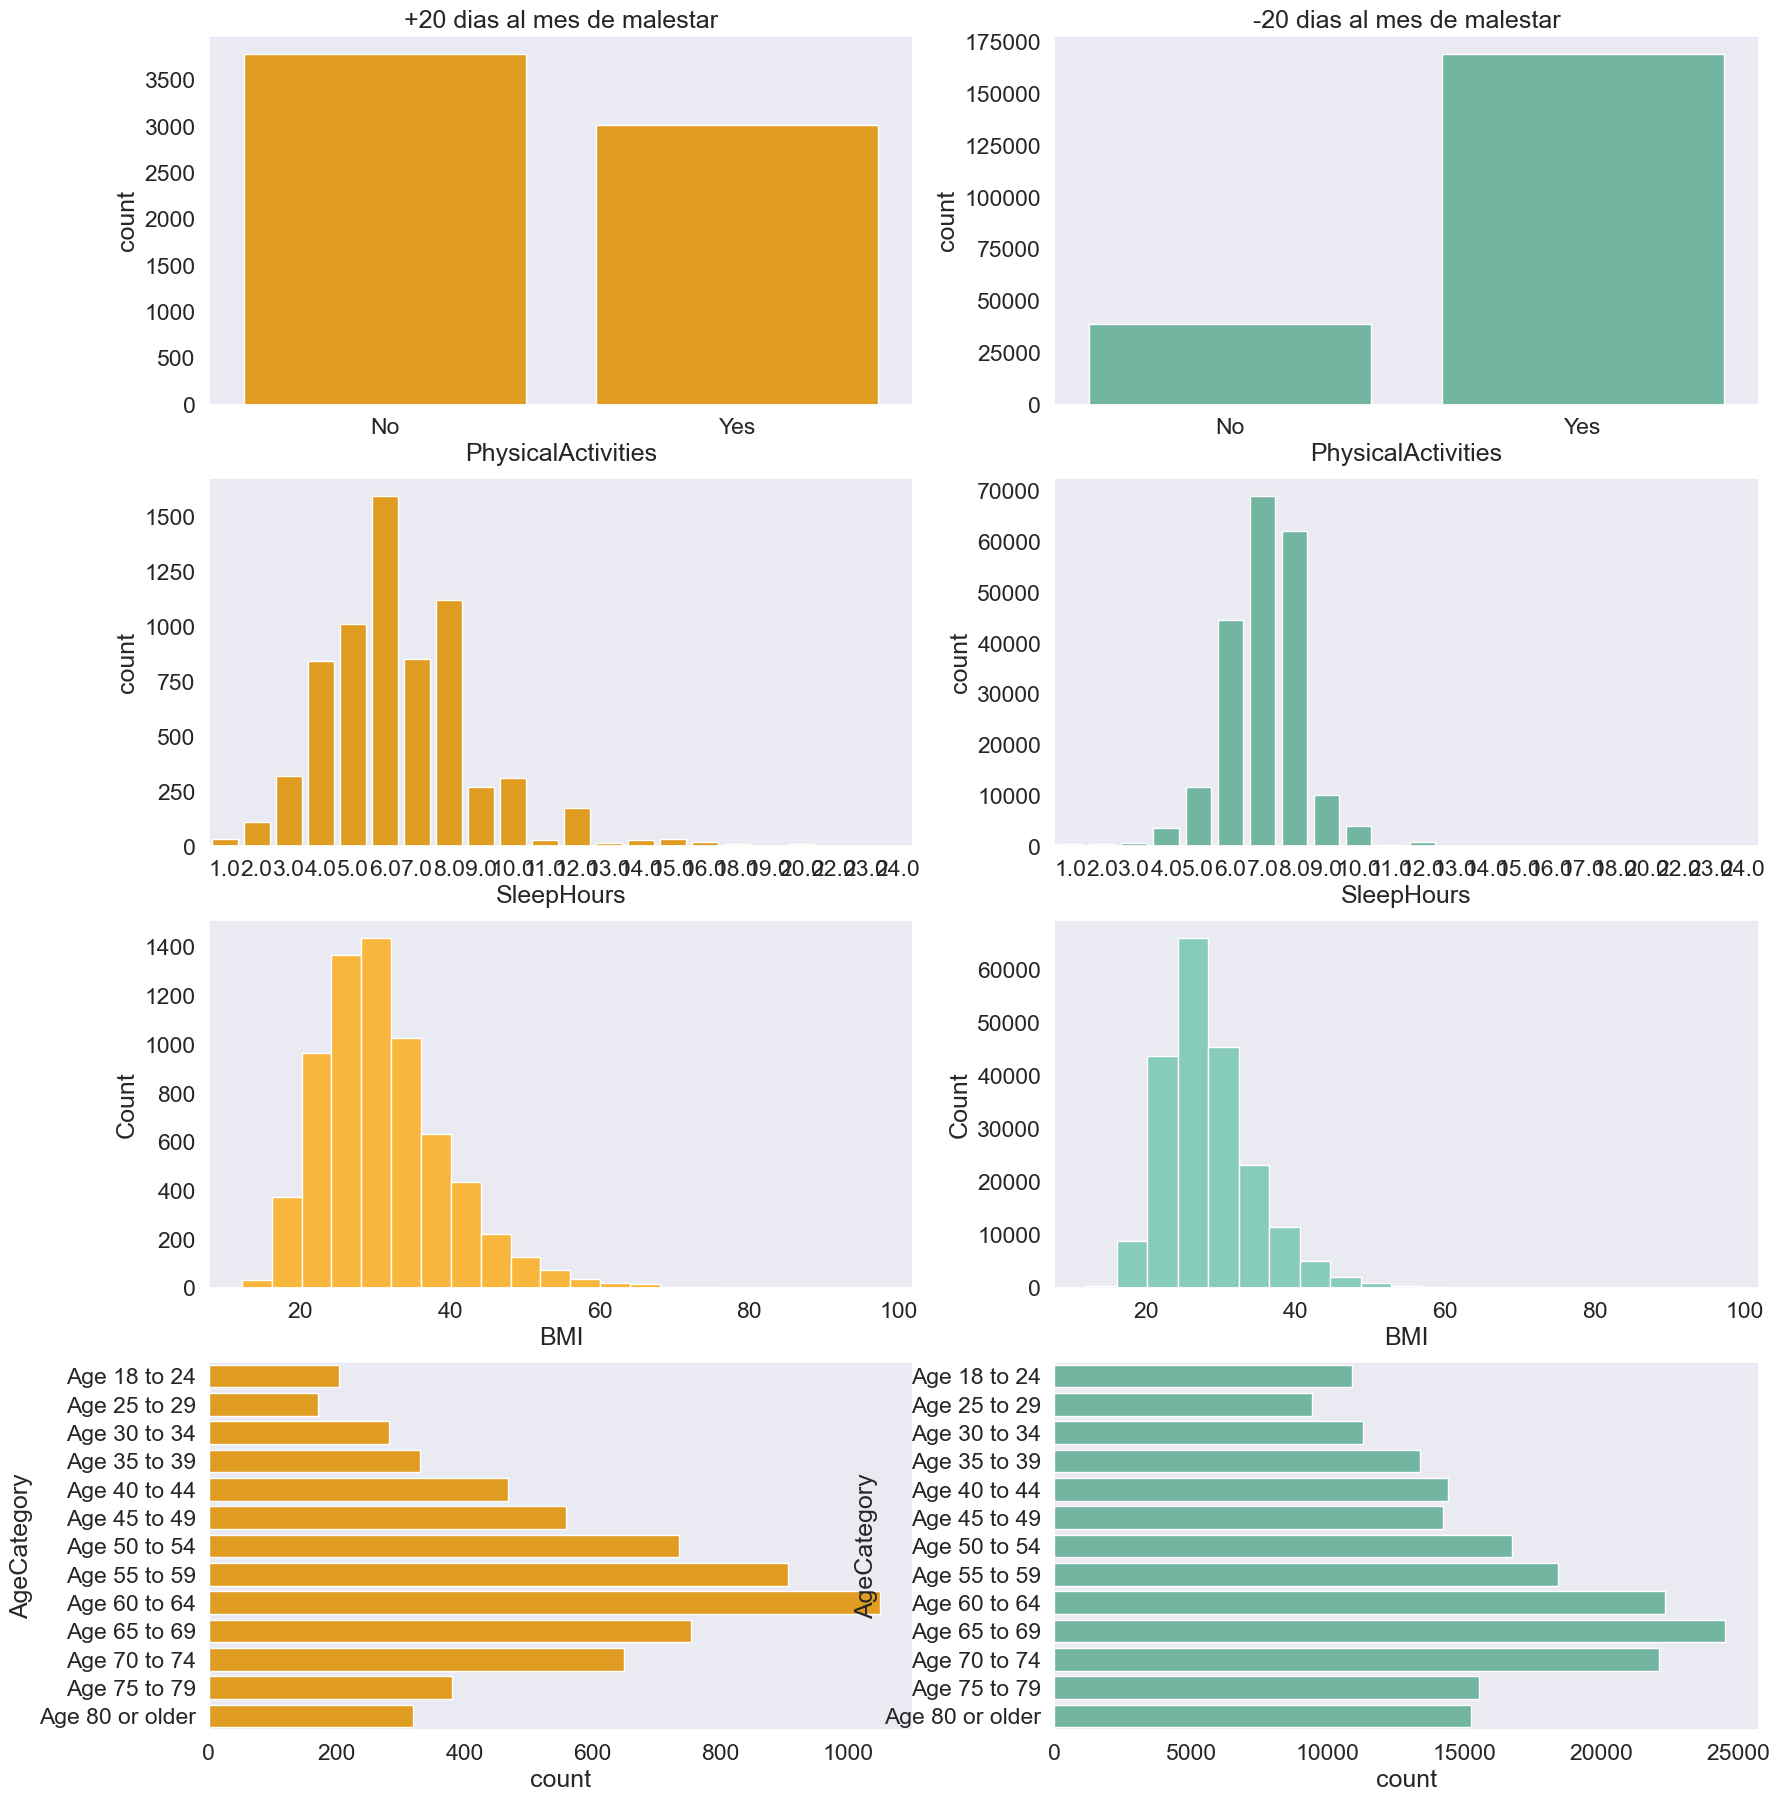

In [12]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,22))


ax1.set_title("+20 dias al mes de malestar")
sns.countplot(data=PLUS30, x="PhysicalActivities", ax=ax1, color='orange')
sns.countplot(data=PLUS30, x="SleepHours", ax=ax3, color='orange')
sns.histplot(data=PLUS30, x="BMI", ax=ax5, binwidth=4, color='orange')
sns.countplot(data=PLUS30, y="AgeCategory", ax=ax7, order=order_of_bars_age, color='orange')

ax2.set_title("-20 dias al mes de malestar")
sns.countplot(data=MINUS30, x="PhysicalActivities", ax=ax2, order=['No', 'Yes'])
sns.countplot(data=MINUS30, x="SleepHours", ax=ax4)
sns.histplot(data=MINUS30, x="BMI", ax=ax6, binwidth=4)
sns.countplot(data=MINUS30, y="AgeCategory", ax=ax8, order=order_of_bars_age)

ax5.sharex(ax6)

### Jovenes con mas dias de malestar mental

,PhysicalHealthDays,MentalHealthDays,TotalDays,PhysicalHealthDays %,MentalHealthDays %
AgeCategory,,,,,
Age 18 to 24,33793.0,98632.0,132425.0,25.518595,74.481405
Age 25 to 29,28709.0,73341.0,102050.0,28.132288,71.867712
Age 30 to 34,38871.0,82983.0,121854.0,31.899650,68.100350
Age 35 to 39,46158.0,86532.0,132690.0,34.786344,65.213656
Age 40 to 44,58034.0,89336.0,147370.0,39.379792,60.620208
Age 45 to 49,63711.0,80879.0,144590.0,44.063213,55.936787
Age 50 to 54,84874.0,91579.0,176453.0,48.100061,51.899939
Age 55 to 59,107393.0,94551.0,201944.0,53.179594,46.820406
Age 60 to 64,131382.0,99006.0,230388.0,57.026408,42.973592


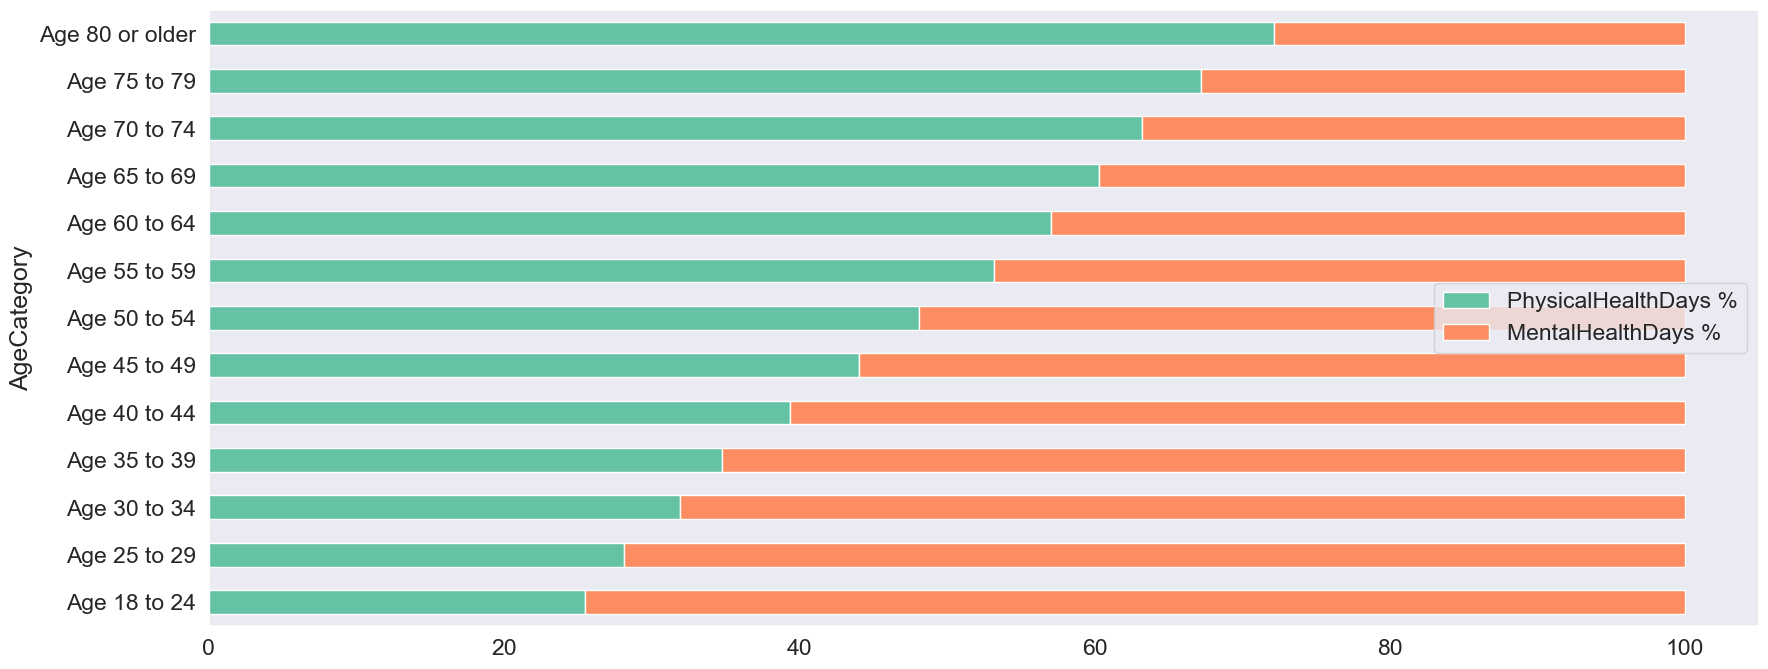

In [13]:
small_data = data[["AgeCategory", "PhysicalHealthDays", "MentalHealthDays"]]
grouped_data = small_data.groupby('AgeCategory').sum()
grouped_data["TotalDays"] = grouped_data["PhysicalHealthDays"] + grouped_data["MentalHealthDays"]
grouped_data["PhysicalHealthDays %"] = grouped_data["PhysicalHealthDays"] / grouped_data["TotalDays"] * 100
grouped_data["MentalHealthDays %"] = grouped_data["MentalHealthDays"] / grouped_data["TotalDays"] * 100

grouped_data[["PhysicalHealthDays %", "MentalHealthDays %"]].plot(kind="barh", stacked=True)
grouped_data

In [14]:
mental_data = data.copy()
mental_data['MoreMentalHealthDays'] = mental_data['MentalHealthDays'] > mental_data['PhysicalHealthDays']
mental_data['MoreMentalHealthDays'] = mental_data['MoreMentalHealthDays'].astype(int)

In [18]:
yes = mental_data[mental_data["MoreMentalHealthDays"] == 1]
no = mental_data[mental_data["MoreMentalHealthDays"] == 0]


<Axes: xlabel='AlcoholDrinkers', ylabel='count'>

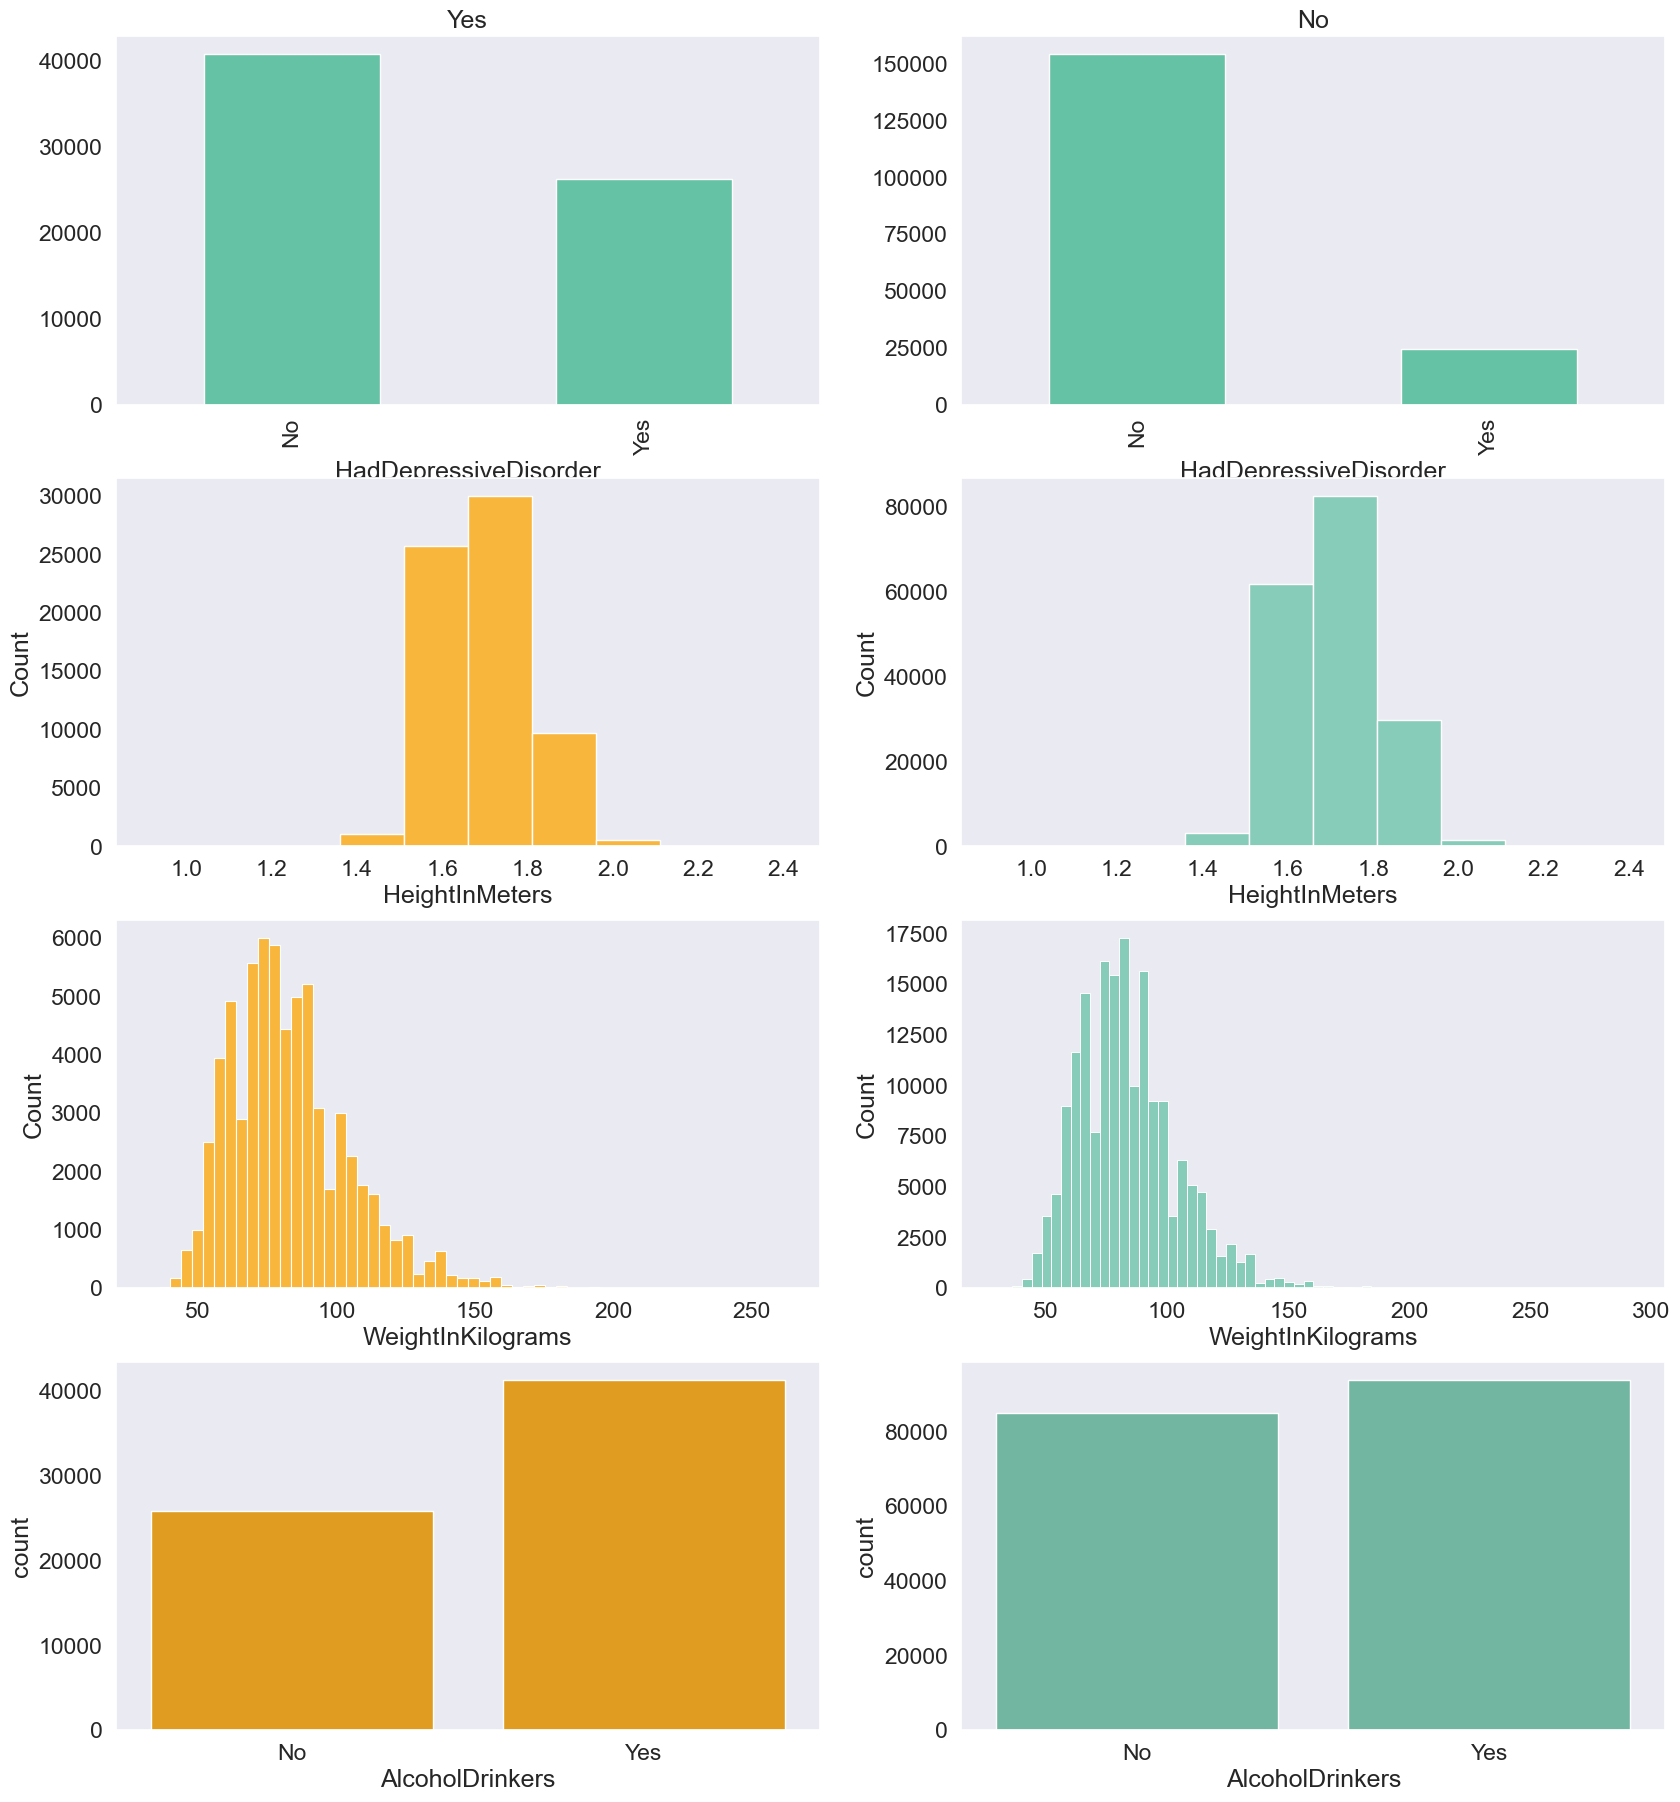

In [19]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,22))


ax1.set_title("Yes")
yes.groupby(["HadDepressiveDisorder"]).size().plot(kind='bar', ax=ax1)
sns.histplot(data=yes, x="HeightInMeters", ax=ax3, color='orange', bins=10)
sns.histplot(data=yes, x="WeightInKilograms", ax=ax5, binwidth=4, color='orange')
sns.countplot(data=yes, x="AlcoholDrinkers", ax=ax7, color='orange')

ax2.set_title("No")
no.groupby(["HadDepressiveDisorder"]).size().plot(kind='bar', ax=ax2)
sns.histplot(data=no, x="HeightInMeters", ax=ax4, bins=10)
sns.histplot(data=no, x="WeightInKilograms", ax=ax6, binwidth=4)
sns.countplot(data=no, x="AlcoholDrinkers", ax=ax8)

# Analisis Estadístico

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
# quito las columnas innecesarias
drop_columns = ["State", "LastCheckupTime", "RemovedTeeth", "ChestScan", "SmokerStatus", "ECigaretteUsage", "HadDiabetes", "RaceEthnicityCategory", "BMI", "TetanusLast10Tdap", "CovidPos", "FluVaxLast12", "PneumoVaxEver"]
model_data = data.drop(columns=drop_columns)
# convierto las columnas Yes/No a binarias
yes_no_columns = [col for col in model_data.columns if data[col].isin(['Yes', 'No']).any()]
model_data[yes_no_columns] = model_data[yes_no_columns].replace({'Yes': 1, 'No': 0})


In [27]:
# convierto dos columnas categoricas a columnas binarias
new_cols = pd.DataFrame()
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(model_data[['GeneralHealth']])
encoded_cols = encoder.transform(model_data[['GeneralHealth']])
encoded_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['GeneralHealth']))
new_cols = pd.concat([new_cols, encoded_data], axis=1)
model_data = pd.concat([model_data, new_cols], axis=1)

new_cols = pd.DataFrame()
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(model_data[['Sex']])
encoded_cols = encoder.transform(model_data[['Sex']])
encoded_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex']))
new_cols = pd.concat([new_cols, encoded_data], axis=1)
model_data = pd.concat([model_data, new_cols], axis=1)

In [28]:
# me quedo con las categorias etareas menores
model_data = model_data.loc[model_data["AgeCategory"] <= "Age 40 to 44"]
model_data.drop(columns=["GeneralHealth", "Sex", "AgeCategory"], inplace=True)

model_data

,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,HighRiskLastYear,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,Sex_Female,Sex_Male
8,2.0,0.0,0,6.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.70,78.02,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49,0.0,0.0,1,6.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.63,68.49,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
75,0.0,0.0,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60,88.45,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
132,15.0,25.0,1,6.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1.75,95.25,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
157,1.0,0.0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.70,63.50,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245998,2.0,10.0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.73,142.88,1,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
246005,0.0,0.0,1,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.75,90.72,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
246007,0.0,0.0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.65,68.04,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
246013,0.0,7.0,0,4.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.65,49.90,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
# creo una columna target segun si los dias de malestar mental son mayores a los dias de malestar fisico
model_data["y"] = (model_data["MentalHealthDays"] > model_data["PhysicalHealthDays"]).astype(int)
model_data

,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,HighRiskLastYear,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,Sex_Female,Sex_Male,y
8,2.0,0.0,0,6.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.70,78.02,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
49,0.0,0.0,1,6.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.63,68.49,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
75,0.0,0.0,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60,88.45,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
132,15.0,25.0,1,6.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1.75,95.25,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
157,1.0,0.0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.70,63.50,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245998,2.0,10.0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.73,142.88,1,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
246005,0.0,0.0,1,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.75,90.72,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
246007,0.0,0.0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.65,68.04,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
246013,0.0,7.0,0,4.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.65,49.90,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


### Implementación del método PCA

In [32]:
x = model_data.drop("y", axis=1)
y = model_data["y"]
nombres = x.columns

print("x: ", x.shape)
print("y: ", y.shape)

x:  (70164, 31)
y:  (70164,)


In [34]:
# estandarizo los valores de las X´s
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [35]:
pca = PCA()
pca.fit(x, y)
x_new = pca.transform(x)

# varianza por cada componente
print(pca.explained_variance_ratio_)
print([round(x,3) for x in pca.explained_variance_ratio_])

# cargas
print(pca.components_)

[1.20000071e-01 8.85327958e-02 4.97899694e-02 4.90830082e-02
 4.28954541e-02 4.16017117e-02 3.75272793e-02 3.53936092e-02
 3.36263710e-02 3.27754380e-02 3.22690718e-02 3.13003807e-02
 3.08808746e-02 3.00101967e-02 2.96781178e-02 2.85068332e-02
 2.81591120e-02 2.79827489e-02 2.68033911e-02 2.65054074e-02
 2.57184940e-02 2.47526689e-02 2.40379099e-02 2.09071839e-02
 1.90189739e-02 1.75609231e-02 1.73208526e-02 1.60273317e-02
 1.13338195e-02 1.03072027e-29 2.74047001e-33]
[0.12, 0.089, 0.05, 0.049, 0.043, 0.042, 0.038, 0.035, 0.034, 0.033, 0.032, 0.031, 0.031, 0.03, 0.03, 0.029, 0.028, 0.028, 0.027, 0.027, 0.026, 0.025, 0.024, 0.021, 0.019, 0.018, 0.017, 0.016, 0.011, 0.0, 0.0]
[[ 3.17567138e-01  2.95153514e-01 -1.28187356e-01 -9.83254356e-02
   9.26665333e-02  9.09926556e-02  1.09154175e-01  1.47157046e-01
   2.78926044e-02  1.55821736e-01  2.73470315e-01  9.71704696e-02
   2.23850277e-01  8.56053807e-02  1.23244669e-01  2.83668347e-01
   2.94063057e-01  2.48447925e-01  3.01665440e-01 -1

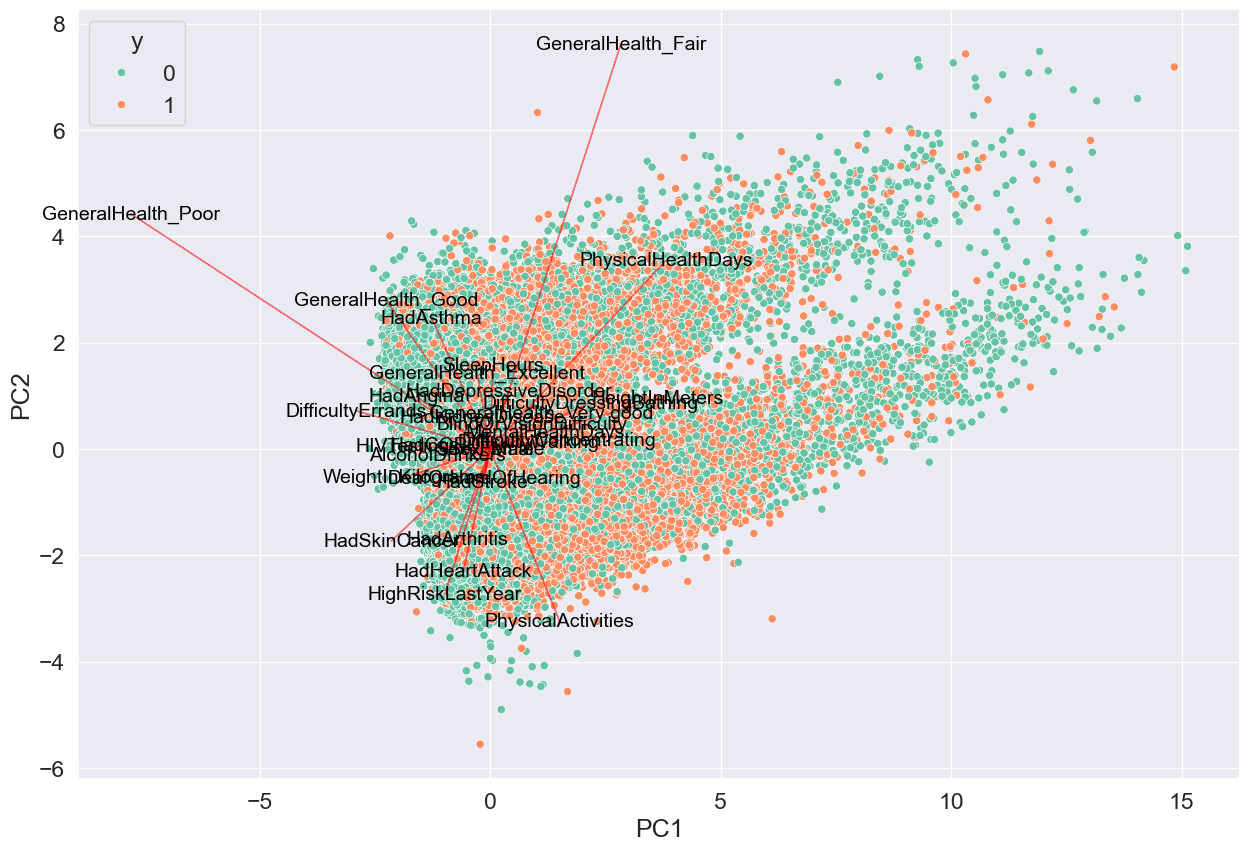

In [52]:

def myplot(score,coeff,labels=None,target_names=None):
    x1 = score[:,0]
    x2 = score[:,1]
    n = coeff.shape[0]
    colores = ['red' if value == 0 else 'blue' for value in y]
    scatter = sns.scatterplot(x=x1, y=x2, hue=y, alpha=1)
    # print(scatter.legend_elements())
    # plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=32)

    # flechas de las proyecciones de las variables originales
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*12, coeff[i,1]*12, color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]*12, coeff[i,1]*12, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center', fontsize=14)
        else:
            plt.text(coeff[i,0]*12, coeff[i,1]*12, labels[i], color = 'black', ha = 'center', va = 'center', fontsize=14)

# grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], pca.components_, nombres, y)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


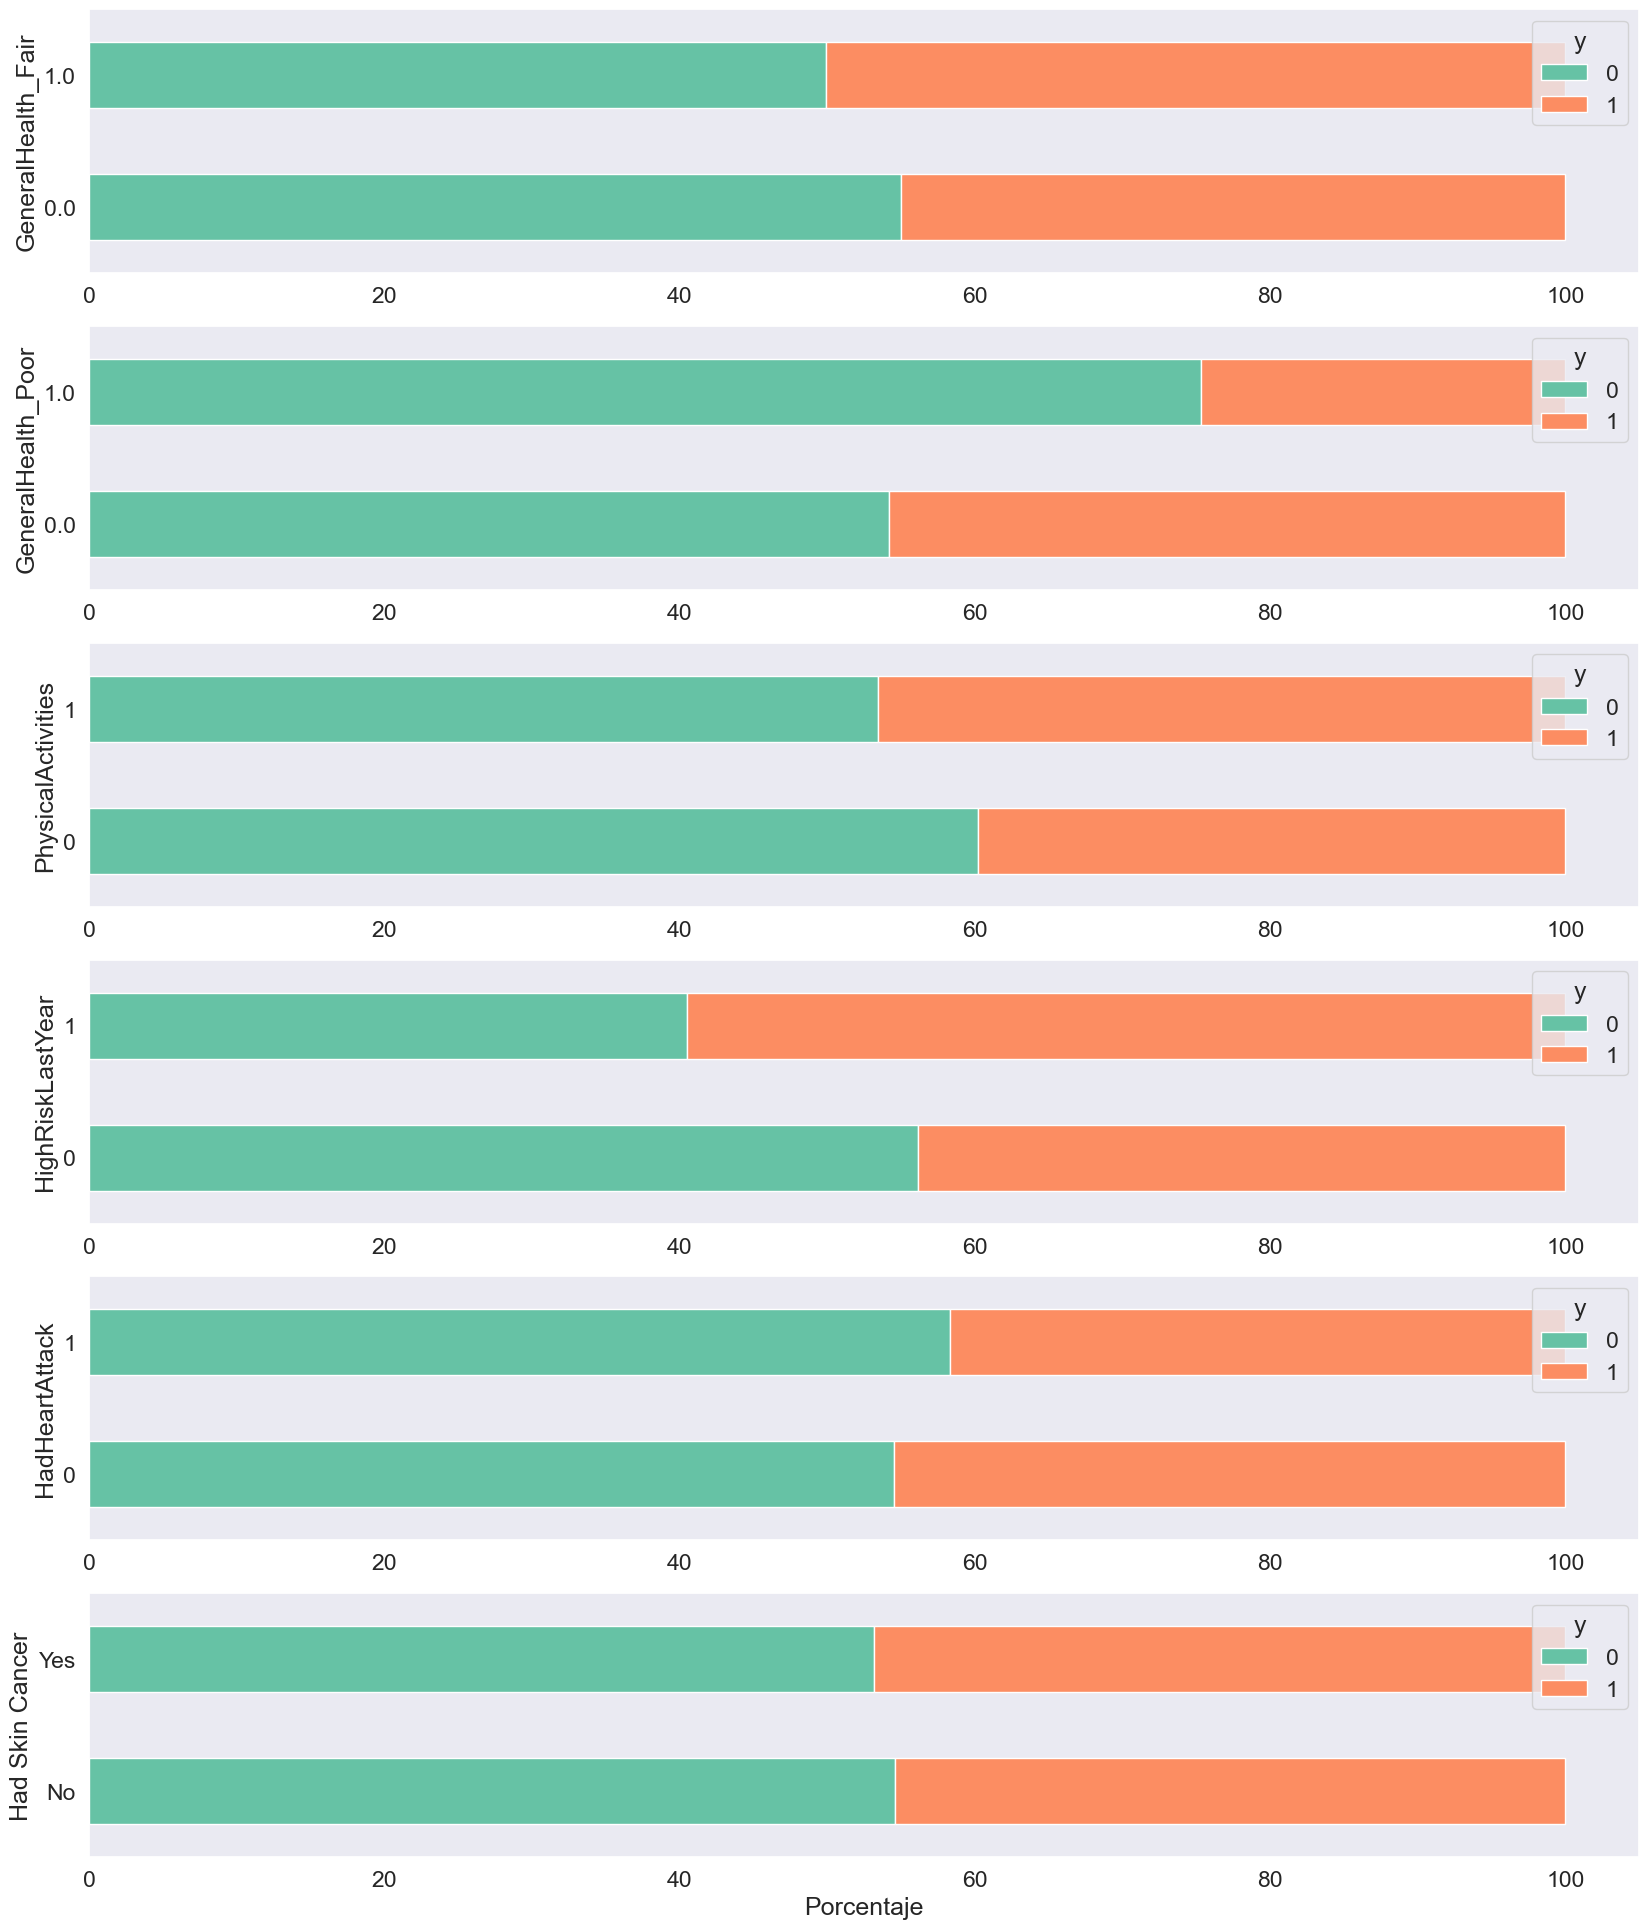

In [95]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6, figsize=(20,24))


_ = model_data[["GeneralHealth_Fair", "y"]]
_ = model_data.groupby(["GeneralHealth_Fair", "y"]).size().reset_index(name='count')
_ = _.pivot(index='GeneralHealth_Fair', columns='y', values='count')
_ = _.div(_.sum(axis=1), axis=0) * 100
_.plot(kind='barh', stacked=True, ax=ax1)
plt.ylabel('GeneralHealth_Fair')
plt.yticks([1, 0], ["Yes", "No"])
plt.xlabel('Porcentaje')
plt.legend(title='y')

_ = model_data[["GeneralHealth_Poor", "y"]]
_ = model_data.groupby(["GeneralHealth_Poor", "y"]).size().reset_index(name='count')
_ = _.pivot(index='GeneralHealth_Poor', columns='y', values='count')
_ = _.div(_.sum(axis=1), axis=0) * 100
_.plot(kind='barh', stacked=True, ax=ax2)
plt.ylabel('GeneralHealth_Poor')
plt.yticks([1, 0], ["Yes", "No"])
plt.xlabel('Porcentaje')
plt.legend(title='y')

_ = model_data[["PhysicalActivities", "y"]]
_ = model_data.groupby(["PhysicalActivities", "y"]).size().reset_index(name='count')
_ = _.pivot(index='PhysicalActivities', columns='y', values='count')
_ = _.div(_.sum(axis=1), axis=0) * 100
_.plot(kind='barh', stacked=True, ax=ax3)
plt.ylabel('Physical Activities')
plt.yticks([1, 0], ["Yes", "No"])
plt.xlabel('Porcentaje')
plt.legend(title='y')


_ = model_data[["HighRiskLastYear", "y"]]
_ = model_data.groupby(["HighRiskLastYear", "y"]).size().reset_index(name='count')
_ = _.pivot(index='HighRiskLastYear', columns='y', values='count')
_ = _.div(_.sum(axis=1), axis=0) * 100
_.plot(kind='barh', stacked=True, ax=ax4)
plt.ylabel('High Risk Last Year')
plt.yticks([1, 0], ["Yes", "No"])
plt.xlabel('Porcentaje')
plt.legend(title='y')

_ = model_data[["HadHeartAttack", "y"]]
_ = model_data.groupby(["HadHeartAttack", "y"]).size().reset_index(name='count')
_ = _.pivot(index='HadHeartAttack', columns='y', values='count')
_ = _.div(_.sum(axis=1), axis=0) * 100
_.plot(kind='barh', stacked=True, ax=ax5)
plt.ylabel('Had Heart Attack')
plt.yticks([1, 0], ["Yes", "No"])
plt.xlabel('Porcentaje')
plt.legend(title='y')

_ = model_data[["HadSkinCancer", "y"]]
_ = model_data.groupby(["HadSkinCancer", "y"]).size().reset_index(name='count')
_ = _.pivot(index='HadSkinCancer', columns='y', values='count')
_ = _.div(_.sum(axis=1), axis=0) * 100
_.plot(kind='barh', stacked=True, ax=ax6)
plt.ylabel('Had Skin Cancer')
plt.yticks([1, 0], ["Yes", "No"])
plt.xlabel('Porcentaje')
plt.legend(title='y')